# 1.3 Complejidad temporal



## 1.3.1 Introducción


La complejidad temporal se interesa no en los valores exactos de tiempo de ejecución —los cuales dependen de factores como el hardware o el compilador—, sino en **cómo crece el tiempo requerido cuando el tamaño de la entrada $n$ tiende a infinito**.  

Ejemplos:
- Un algoritmo que recorre linealmente un arreglo de longitud $n$ tiene complejidad $O(n)$.
- Un algoritmo que compara todos los pares de elementos de una lista tiene complejidad $O(n^2)$.


Existen diferentes órdenes de complejidad en los algoritmos, los cuales describen la manera en que el tiempo de ejecución crece a medida que aumenta el tamaño de la entrada $n$.  
Algunas de las más comunes en el análisis algorítmico son: $O(1)$, $O(\log n)$, $O(n)$, $O(n \log n)$, $O(n^2)$, $O(2^n)$ y $O(n!)$.  

## 1.3.2 Factibilidad de los algoritmos


En ciencias de la computación, muchas veces el problema no radica en determinar si un problema es **teóricamente resoluble** o no (es decir, si existe un algoritmo que lo resuelva en algún número finito de pasos).  
El verdadero desafío suele ser distinto: **¿podemos resolverlo en un tiempo razonable?**

La noción de *tiempo razonable* depende del contexto y de los recursos disponibles. Un algoritmo que tarda segundos en procesar $n=1000$ datos puede ser útil, pero si al escalar a $n=10^6$ tarda miles de años, deja de ser práctico, aun cuando en teoría “se pueda resolver”.

Para ilustrar esta diferencia, se suele utilizar el análisis de **complejidad temporal**, expresado con notación asintótica. Esta notación describe cómo crece el número de operaciones de un algoritmo a medida que crece el tamaño de la entrada $n$.  

A continuación se muestra una tabla comparativa con diferentes órdenes de complejidad y el tiempo estimado de ejecución, suponiendo que **cada operación tarda 1 milisegundo en ejecutarse**.


| Complejidad | $n=10$     | $n=100$     | $n=1000$        | $n=10^6$           |
|-------------|------------|-------------|-----------------|--------------------|
| $O(1)$      | 1 ms       | 1 ms        | 1 ms            | 1 ms               |
| $O(\log n)$ | 3 ms       | 7 ms        | 10 ms           | 20 ms              |
| $O(n)$      | 10 ms      | 100 ms      | 1 s             | 11.6 días          |
| $O(n \log n)$ | 33 ms    | 664 ms      | 10 s            | 1.6 años           |
| $O(n^2)$    | 0.1 s      | 10 s        | 16.6 min        | 31,709 años        |
| $O(2^n)$    | 1 s        | $4 \times 10^{23}$ años | — | — |
| $O(n!)$     | 3.6 s      | —           | —               | —                  |


Haciendo una observación en la tabla podemos concluir que:

- **Complejidades polinómicas bajas** ($O(1)$, $O(\log n)$, $O(n)$, $O(n \log n)$) son generalmente aceptables en la práctica incluso para valores grandes de $n$.  
- **Complejidades cuadráticas o superiores** ($O(n^2)$, $O(n^3)$) rápidamente se vuelven inviables cuando $n$ crece más allá de algunos miles.  
- **Complejidades exponenciales o factoriales** ($O(2^n)$, $O(n!)$) son prácticamente imposibles de ejecutar incluso para valores pequeños de $n$.  

Abajo se incluye el codigo de python que visualiza el crecimiento tanto en cántidad de operaciones asi como en el tiempo necesario para poder llevar a cabo una tarea dependiendo de la complejidad en $n$ de la tarea. 


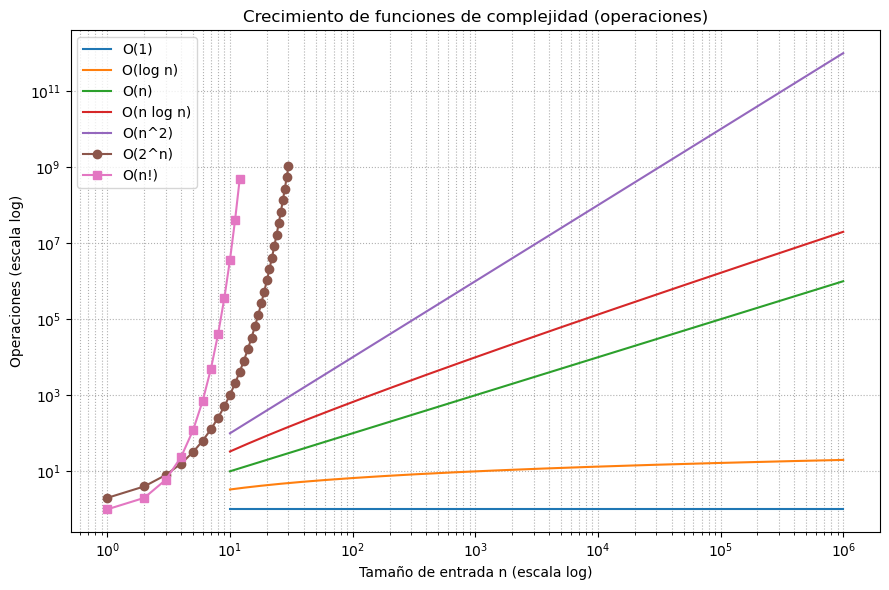

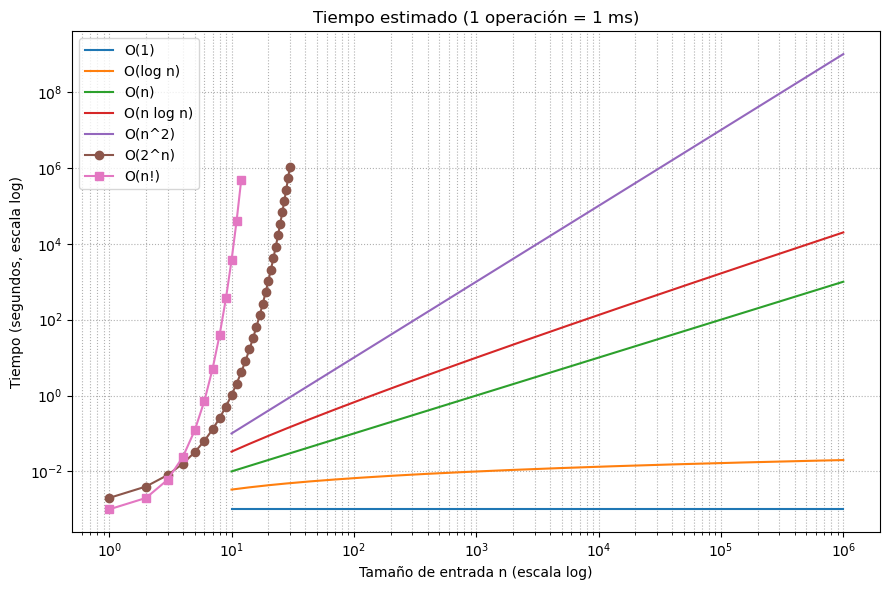

Resumen (operaciones) para n en [10, 100, 1000, 1000000]
n=       10 | O(1)=1 | O(log n)=3.32 | O(n)=10 | O(n log n)=33.22 | O(n^2)=100
n=      100 | O(1)=1 | O(log n)=6.64 | O(n)=100 | O(n log n)=664.39 | O(n^2)=10000
n=     1000 | O(1)=1 | O(log n)=9.97 | O(n)=1000 | O(n log n)=9965.78 | O(n^2)=1000000
n=  1000000 | O(1)=1 | O(log n)=19.93 | O(n)=1000000 | O(n log n)=19931568.57 | O(n^2)=1000000000000

Valores de referencia para O(2^n) y O(n!) en dominios acotados:
2^10 = 1,024
2^20 = 1,048,576
2^30 = 1,073,741,824
5! = 120
8! = 40,320
10! = 3,628,800
12! = 479,001,600


In [2]:
# Crecimiento de funciones de complejidad y su tiempo (asumiendo 1 operación = 1 ms)
import numpy as np
import math
import matplotlib.pyplot as plt

# --- 1) Dominio de n para distintas familias ---
# Complejidades "manejables" en un rango amplio
n_wide = np.unique(np.logspace(1, 6, num=250, base=10, dtype=int))   # 10 ... 1,000,000 (enteros)
n_wide = n_wide[n_wide > 0]

# Complejidades explosivas en rangos pequeños
n_exp  = np.arange(1, 31)   # para 2^n (hasta 2^30)
n_fact = np.arange(1, 13)   # para n! (hasta 12!)

# --- 2) Funciones de complejidad (número de "operaciones") ---
def f_O1(n):       return np.ones_like(n, dtype=float)
def f_log(n):      return np.log2(n)                 # log base 2
def f_n(n):        return n.astype(float)
def f_nlogn(n):    return n * np.log2(n)
def f_n2(n):       return (n.astype(float))**2
def f_2n(n):       return 2.0**n
def f_nf(n):       # factorial con enteros pequeños
    return np.array([math.factorial(int(k)) for k in n], dtype=float)

# Valores (operaciones)
ops_O1    = f_O1(n_wide)
ops_log   = f_log(n_wide)
ops_n     = f_n(n_wide)
ops_nlogn = f_nlogn(n_wide)
ops_n2    = f_n2(n_wide)
ops_2n    = f_2n(n_exp)
ops_nf    = f_nf(n_fact)

# --- 3) Convertir "operaciones" a tiempo asumiendo 1 operación = 1 ms ---
# 1 operación -> 1e-3 segundos
def ops_to_seconds(ops): 
    return ops * 1e-3

t_O1    = ops_to_seconds(ops_O1)
t_log   = ops_to_seconds(ops_log)
t_n     = ops_to_seconds(ops_n)
t_nlogn = ops_to_seconds(ops_nlogn)
t_n2    = ops_to_seconds(ops_n2)
t_2n    = ops_to_seconds(ops_2n)
t_nf    = ops_to_seconds(ops_nf)

# --- 4) Gráfico 1: Número de operaciones vs n (escala log-log) ---
plt.figure(figsize=(9,6))
plt.loglog(n_wide, ops_O1,    label="O(1)")
plt.loglog(n_wide, ops_log,   label="O(log n)")
plt.loglog(n_wide, ops_n,     label="O(n)")
plt.loglog(n_wide, ops_nlogn, label="O(n log n)")
plt.loglog(n_wide, ops_n2,    label="O(n^2)")

# Series con dominio más pequeño (como líneas con marcadores)
plt.loglog(n_exp,  ops_2n, 'o-', label="O(2^n)")
plt.loglog(n_fact, ops_nf, 's-', label="O(n!)")

plt.title("Crecimiento de funciones de complejidad (operaciones)")
plt.xlabel("Tamaño de entrada n (escala log)")
plt.ylabel("Operaciones (escala log)")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

# --- 5) Gráfico 2: Tiempo en segundos vs n (escala log-log) ---
plt.figure(figsize=(9,6))
plt.loglog(n_wide, t_O1,    label="O(1)")
plt.loglog(n_wide, t_log,   label="O(log n)")
plt.loglog(n_wide, t_n,     label="O(n)")
plt.loglog(n_wide, t_nlogn, label="O(n log n)")
plt.loglog(n_wide, t_n2,    label="O(n^2)")
plt.loglog(n_exp,  t_2n, 'o-', label="O(2^n)")
plt.loglog(n_fact, t_nf, 's-', label="O(n!)")

plt.title("Tiempo estimado (1 operación = 1 ms)")
plt.xlabel("Tamaño de entrada n (escala log)")
plt.ylabel("Tiempo (segundos, escala log)")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.show()

# --- 6) Impresiones de referencia para algunos n ---
check_ns = [10, 100, 1_000, 1_000_000]
print("Resumen (operaciones) para n en", check_ns)
for n in check_ns:
    o1    = 1
    olog  = math.log2(n)
    on    = n
    onln  = n * math.log2(n)
    on2   = n**2
    print(f"n={n:>9} | O(1)={o1:.0f} | O(log n)={olog:.2f} | O(n)={on:.0f} | O(n log n)={onln:.2f} | O(n^2)={on2:.0f}")

print("\nValores de referencia para O(2^n) y O(n!) en dominios acotados:")
for n in [10, 20, 30]:
    print(f"2^{n} = {2**n:,}")
for n in [5, 8, 10, 12]:
    print(f"{n}! = {math.factorial(n):,}")


## 1.3.3 Dos algoritmos de ordenamiento

### **Bubble Sort**

El **Bubble Sort** es uno de los algoritmos de ordenamiento más simples y clásicos en ciencias de la computación. Su funcionamiento se basa en comparar repetidamente **pares de elementos adyacentes** en una lista y **intercambiarlos** si están en el orden incorrecto. De esta manera, los elementos más grandes "van subiendo" hacia el final de la lista en cada pasada, de forma análoga a cómo las burbujas más grandes ascienden a la superficie del agua.  

In [11]:
def bubble_sort_pasos(lista):
    n = len(lista)
    for i in range(n):
        print(f"Iteración {i+1}: {lista}")
        for j in range(0, n-i-1):
            if lista[j] > lista[j+1]:
                lista[j], lista[j+1] = lista[j+1], lista[j]
    return lista

# Ejemplo
datos =  [9, 2, 6, 3, 1, 8, 5]
resultado = bubble_sort_pasos(datos)
print("Resultado final:", resultado)


Iteración 1: [9, 2, 6, 3, 1, 8, 5]
Iteración 2: [2, 6, 3, 1, 8, 5, 9]
Iteración 3: [2, 3, 1, 6, 5, 8, 9]
Iteración 4: [2, 1, 3, 5, 6, 8, 9]
Iteración 5: [1, 2, 3, 5, 6, 8, 9]
Iteración 6: [1, 2, 3, 5, 6, 8, 9]
Iteración 7: [1, 2, 3, 5, 6, 8, 9]
Resultado final: [1, 2, 3, 5, 6, 8, 9]


In [8]:
# 1) Utilidades: generación de pasos de Bubble Sort

from typing import Iterator, Tuple, List

def bubble_sort_steps(arr: List[int]) -> Iterator[Tuple[List[int], int, int, bool, int]]:
    """
    Genera, paso a paso, el estado del arreglo durante Bubble Sort.
    En cada comparación produce una tupla:
        (estado_actual, i, j, hubo_intercambio, paso)
    donde i es el índice de la pasada externa (0..n-1), y j el índice del par comparado.
    """
    a = list(arr)
    n = len(a)
    paso = 0
    for i in range(n):
        swapped = False
        for j in range(0, n - i - 1):
            paso += 1
            did_swap = False
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                swapped = True
                did_swap = True
            # Devolvemos una copia “congelada” del estado actual
            yield (a.copy(), i, j, did_swap, paso)
        if not swapped:
            # Si no hubo intercambios, la lista ya está ordenada
            break


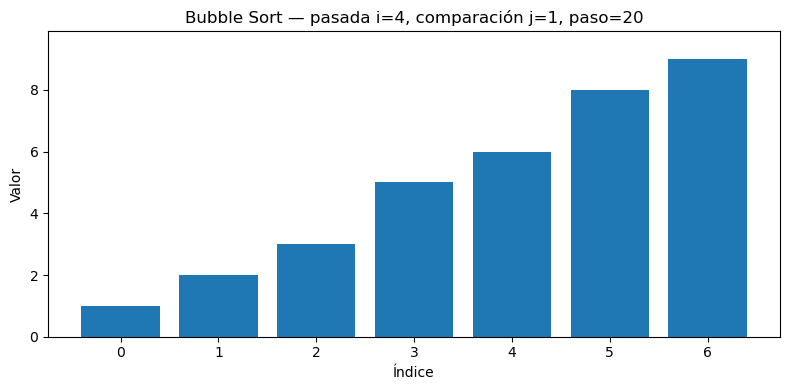

In [10]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

def play_bubble_sort(arr, pause_s=0.2):
    gen = bubble_sort_steps(arr)
    # Estado inicial
    estado_inicial = list(arr)
    x = np.arange(len(estado_inicial))
    
    plt.figure(figsize=(8,4))
    bars = plt.bar(x, estado_inicial)
    plt.ylim(0, max(1, max(estado_inicial)) * 1.1)
    plt.xlabel("Índice")
    plt.ylabel("Valor")
    title = plt.title("Inicio")
    plt.tight_layout()
    plt.show(block=False)

    # Iterar por pasos
    for estado, i, j, swapped, paso in gen:
        # Limpiar la salida y actualizar la figura
        clear_output(wait=True)
        plt.figure(figsize=(8,4))
        bars = plt.bar(x, estado)
        plt.ylim(0, max(1, max(estado)) * 1.1)
        txt_swap = " (swap)" if swapped else ""
        plt.title(f"Bubble Sort — pasada i={i}, comparación j={j}, paso={paso}{txt_swap}")
        plt.xlabel("Índice")
        plt.ylabel("Valor")
        plt.tight_layout()
        plt.show(block=False)
        time.sleep(pause_s)

    # Estado final en pantalla un poco más de tiempo
    time.sleep(0.5)

# Ejemplo de uso:
arr_demo2 = [9, 2, 6, 3, 1, 8, 5]
play_bubble_sort(arr_demo2, pause_s=0.25)


#### Actividad

Modifica el algoritmo de bubble sort para que se ejecute en 2 direcciones una dejando el valor más grande a la derecha y la otra dejando el valor mas pequeño en la izquierda hasta que termine y luego el más grande a la derecha y así hasta que termine. Luego realiza un reporte estadistico que diga cuanto tiempo tarda cada uno con diferentes valores de n. Y grafique entre el normal y el modificado.

**Merge Sort**

**Merge Sort** es un algoritmo de ordenamiento basado en la técnica de **divide y vencerás**. Que basa su estrategia principal en:
1. **Dividir** el arreglo en mitades hasta obtener listas de tamaño 1 (ya ordenadas por definición).
2. **Ordenar recursivamente** cada mitad.
3. **Combinar (merge)** ambas mitades en una única lista ordenada.

## Pseudocodigo

MERGE-SORT(A):
    si longitud(A) <= 1:
        devolver A

    medio ← longitud(A) // 2
    izquierda ← MERGE-SORT(A[0..medio-1])
    derecha ← MERGE-SORT(A[medio..n-1])

    devolver MERGE(izquierda, derecha)

MERGE(izquierda, derecha):
    resultado ← []

    mientras izquierda y derecha no estén vacías:
        si izquierda[0] <= derecha[0]:
            mover izquierda[0] a resultado
        sino:
            mover derecha[0] a resultado

        añadir los elementos restantes de izquierda (si hay)
        añadir los elementos restantes de derecha (si hay)

    devolver resultado

**Ejemplo paso a paso**
1. Dividimos:
   - `[38, 27, 43]` y `[3, 9, 82, 10]`

2. Ordenamos recursivamente la izquierda `[38, 27, 43]`:
   - `[38]` y `[27, 43]`
   - `[27]` y `[43]` → merge → `[27, 43]`
   - merge `[38]` y `[27, 43]` → `[27, 38, 43]`

3. Ordenamos recursivamente la derecha `[3, 9, 82, 10]`:
   - `[3, 9]` y `[82, 10]`
   - `[3]` y `[9]` → merge → `[3, 9]`
   - `[82]` y `[10]` → merge → `[10, 82]`
   - merge `[3, 9]` y `[10, 82]` → `[3, 9, 10, 82]`

4. Merge final:
   - `[27, 38, 43]` y `[3, 9, 10, 82]`
   - Resultado final: `[3, 9, 10, 27, 38, 43, 82]`



## 5. Complejidad

- **Tiempo:**  
  - Mejor caso: $O(n \log n)$  
  - Peor caso: $O(n \log n)$  
  - Caso promedio: $O(n \log n)$  

- **Espacio:**  
  - Requiere memoria extra $O(n)$ para almacenar listas intermedias.



## 6. Ventajas y desventajas

**Ventajas**
- Complejidad $O(n \log n)$ garantizada en todos los casos.  
- Es estable (mantiene el orden relativo de elementos iguales).  
- Funciona bien en listas grandes.  

**Desventajas**
- Requiere memoria adicional proporcional al tamaño de la lista.  
- Más complejo de implementar que algoritmos simples como Insertion Sort o Bubble Sort.  



## 7. Conclusión
Merge Sort es uno de los algoritmos de ordenamiento más utilizados en teoría de algoritmos.  
A pesar de requerir espacio extra, su rendimiento consistente lo convierte en una opción robusta para ordenar grandes volúmenes de datos.
